In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("14-income_evaluation.csv")

In [3]:
##Bir banka yeni müşteri kazanım kampanyası yapacak ama herkese kredi veremez.
##Amaç:
##Yüksek gelirli ve düşük riskli müşterileri önceden tahmin etmek

In [4]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
## age: Kişinin yaşı
# workclass: Çalışma sınıfı (devlet, özel sektör, kendi hesabına vb.)
# finalweight: Nüfus örneklem ağırlığı (kişinin demografik temsil ağırlığı)
# education: En yüksek eğitim seviyesi (lise, üniversite vb.)
# education_num: Eğitim seviyesinin sayısal karşılığı
# marital_status: Medeni durum (evli, bekar, boşanmış vb.)
# occupation: Meslek grubu
# relationship: Hane içi aile ilişkisi (eş, çocuk, kendi, vb.)
# race: Irk
# sex: Cinsiyet
# capital_gain: Sermaye kazancı (yatırım vb. kaynaklardan elde edilen gelir)
# capital_loss: Sermaye kaybı (yatırım vb. kaynaklardan zarar)
# hours_per_week: Haftalık çalışma saati
# native_country: Doğum/uyruk ülkesi
# income: Gelir sınıfı etiketi (<=50K veya >50K)

In [6]:
df.shape

(32561, 15)

In [7]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [8]:
col_names=["age","workclass","finalweight","education","education_num","maritial_status","occupation","relationship","race","sex","capital_gain","capital_loss","hours_per_week","native_country","income"]

In [9]:
df.columns=col_names

In [10]:
df.columns

Index(['age', 'workclass', 'finalweight', 'education', 'education_num',
       'maritial_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1   workclass        32561 non-null  object
 2   finalweight      32561 non-null  int64 
 3   education        32561 non-null  object
 4   education_num    32561 non-null  int64 
 5   maritial_status  32561 non-null  object
 6   occupation       32561 non-null  object
 7   relationship     32561 non-null  object
 8   race             32561 non-null  object
 9   sex              32561 non-null  object
 10  capital_gain     32561 non-null  int64 
 11  capital_loss     32561 non-null  int64 
 12  hours_per_week   32561 non-null  int64 
 13  native_country   32561 non-null  object
 14  income           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [12]:
df.describe()

,age,finalweight,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [13]:
df.isnull().sum()

age                0
workclass          0
finalweight        0
education          0
education_num      0
maritial_status    0
occupation         0
relationship       0
race               0
sex                0
capital_gain       0
capital_loss       0
hours_per_week     0
native_country     0
income             0
dtype: int64

In [14]:
categorical=[col for col in df.columns if df[col].dtype=="O"]
numerical=[col for col in df.columns if df[col].dtype!="O"]

In [15]:
categorical

['workclass',
 'education',
 'maritial_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

In [16]:
numerical

['age',
 'finalweight',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

In [17]:
df[categorical].head()

,workclass,education,maritial_status,occupation,relationship,race,sex,native_country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [18]:
## kategorik kolonlarin içindeki değerlere bakıyorum
for col in categorical:
    print(df[col].value_counts())

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64
maritial_status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64
occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial     

Text(0.5, 1.0, 'Cinsiye göre gelir dağılımı')

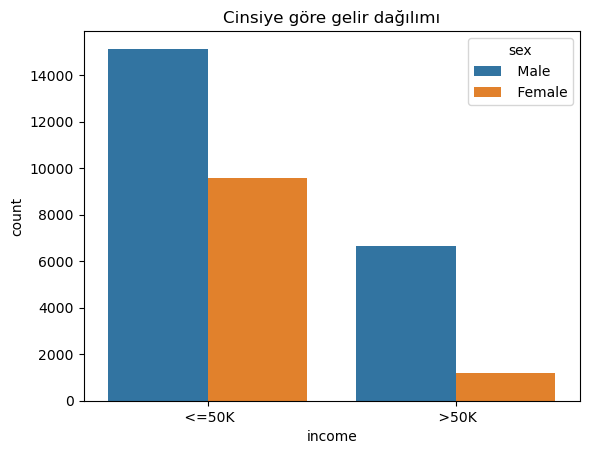

In [ ]:
sns.countplot(x="income",data=df,hue="sex")
plt.title("Cinsiye göre gelir dağılımı")x

Text(0.5, 1.0, 'Irka göre gelir dağılımı')

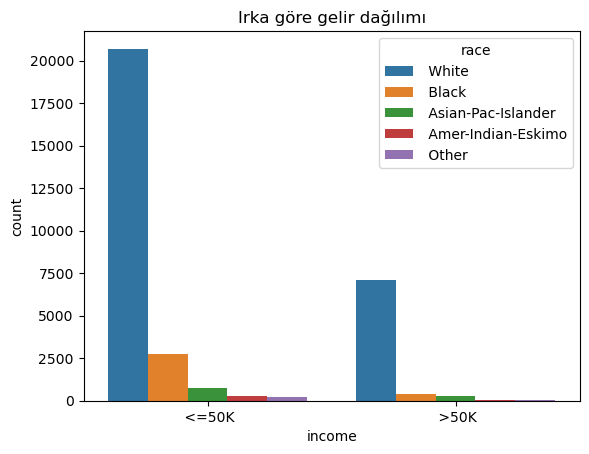

In [20]:
sns.countplot(x="income",data=df,hue="race")
plt.title("Irka göre gelir dağılımı")

Text(0.5, 1.0, 'Mesleğe göre gelir dağılımı')

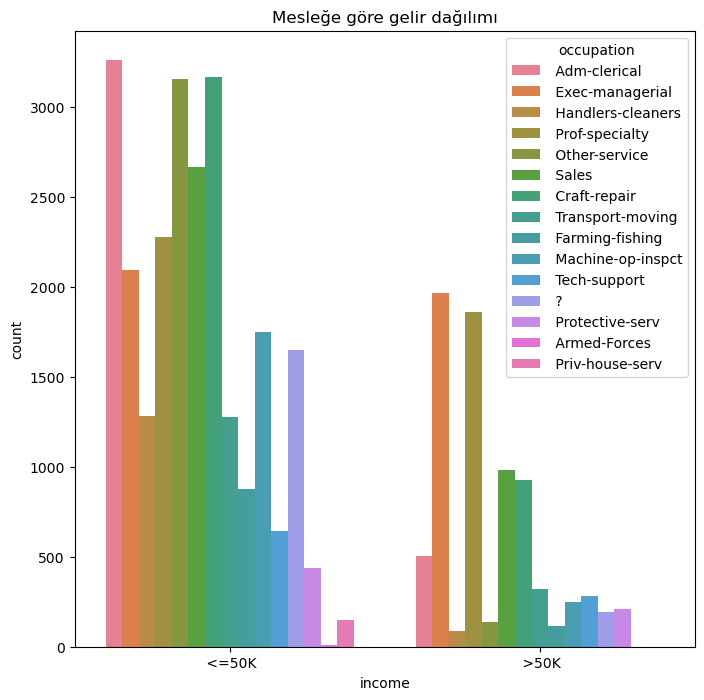

In [21]:
plt.figure(figsize=(8,8))
sns.countplot(x="income",data=df,hue="occupation")
plt.title("Mesleğe göre gelir dağılımı")

In [22]:
df.head()

,age,workclass,finalweight,education,education_num,maritial_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


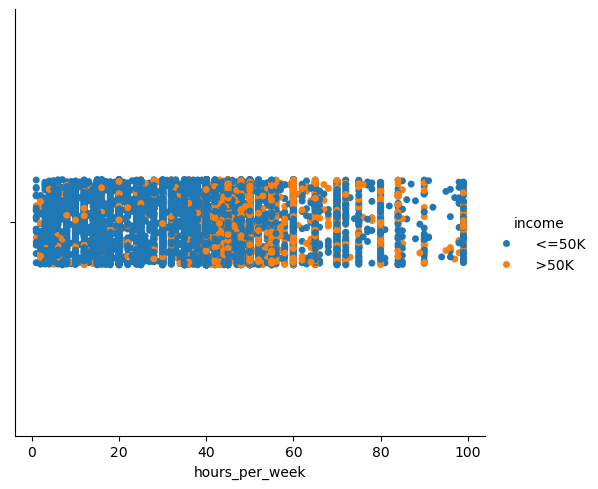

In [23]:
sns.catplot(x=df["hours_per_week"],hue=df["income"])

In [24]:
over_40_hours=df[df["hours_per_week"]>40]
under_40_hours=df[df["hours_per_week"]<=40]


In [25]:
over_40_hours["income"].value_counts()

income
<=50K    5725
>50K     3856
Name: count, dtype: int64

In [26]:
under_40_hours["income"].value_counts()

income
<=50K    18995
>50K      3985
Name: count, dtype: int64

In [27]:
## 40 saatten fazla çalısanların yüzde kaçı 50 bin dolardan fazla kazanir?
3858 / (5725 + 3856)

0.40267195491076085

In [28]:
## 40 saatten az çalısanların yüzde kaçı 50 bin dolardan fazla kazanir?
3895 / (18995 + 3895)

0.17016164263870687

In [29]:
##kategorik degisken ? vs temizliği

In [30]:
df["workclass"].value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [31]:
df["workclass"].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [32]:
df["workclass"]=df["workclass"].replace(" ?",np.nan)

In [33]:
df["workclass"].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', nan, ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [34]:
categorical


['workclass',
 'education',
 'maritial_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

In [35]:
df["occupation"].value_counts()
df["occupation"].unique()


array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [36]:
df["occupation"]=df["occupation"].replace(" ?",np.nan)

In [37]:
df["native_country"].value_counts()
df["native_country"].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [38]:
df["native_country"]=df["native_country"].replace(" ?",np.nan)

In [39]:
df["income"].value_counts()

income
<=50K    24720
>50K      7841
Name: count, dtype: int64

In [40]:
df.isnull().sum()

age                   0
workclass          1836
finalweight           0
education             0
education_num         0
maritial_status       0
occupation         1843
relationship          0
race                  0
sex                   0
capital_gain          0
capital_loss          0
hours_per_week        0
native_country      583
income                0
dtype: int64

In [41]:
df.drop_duplicates(inplace=True)


In [42]:
df.duplicated().sum()

np.int64(0)

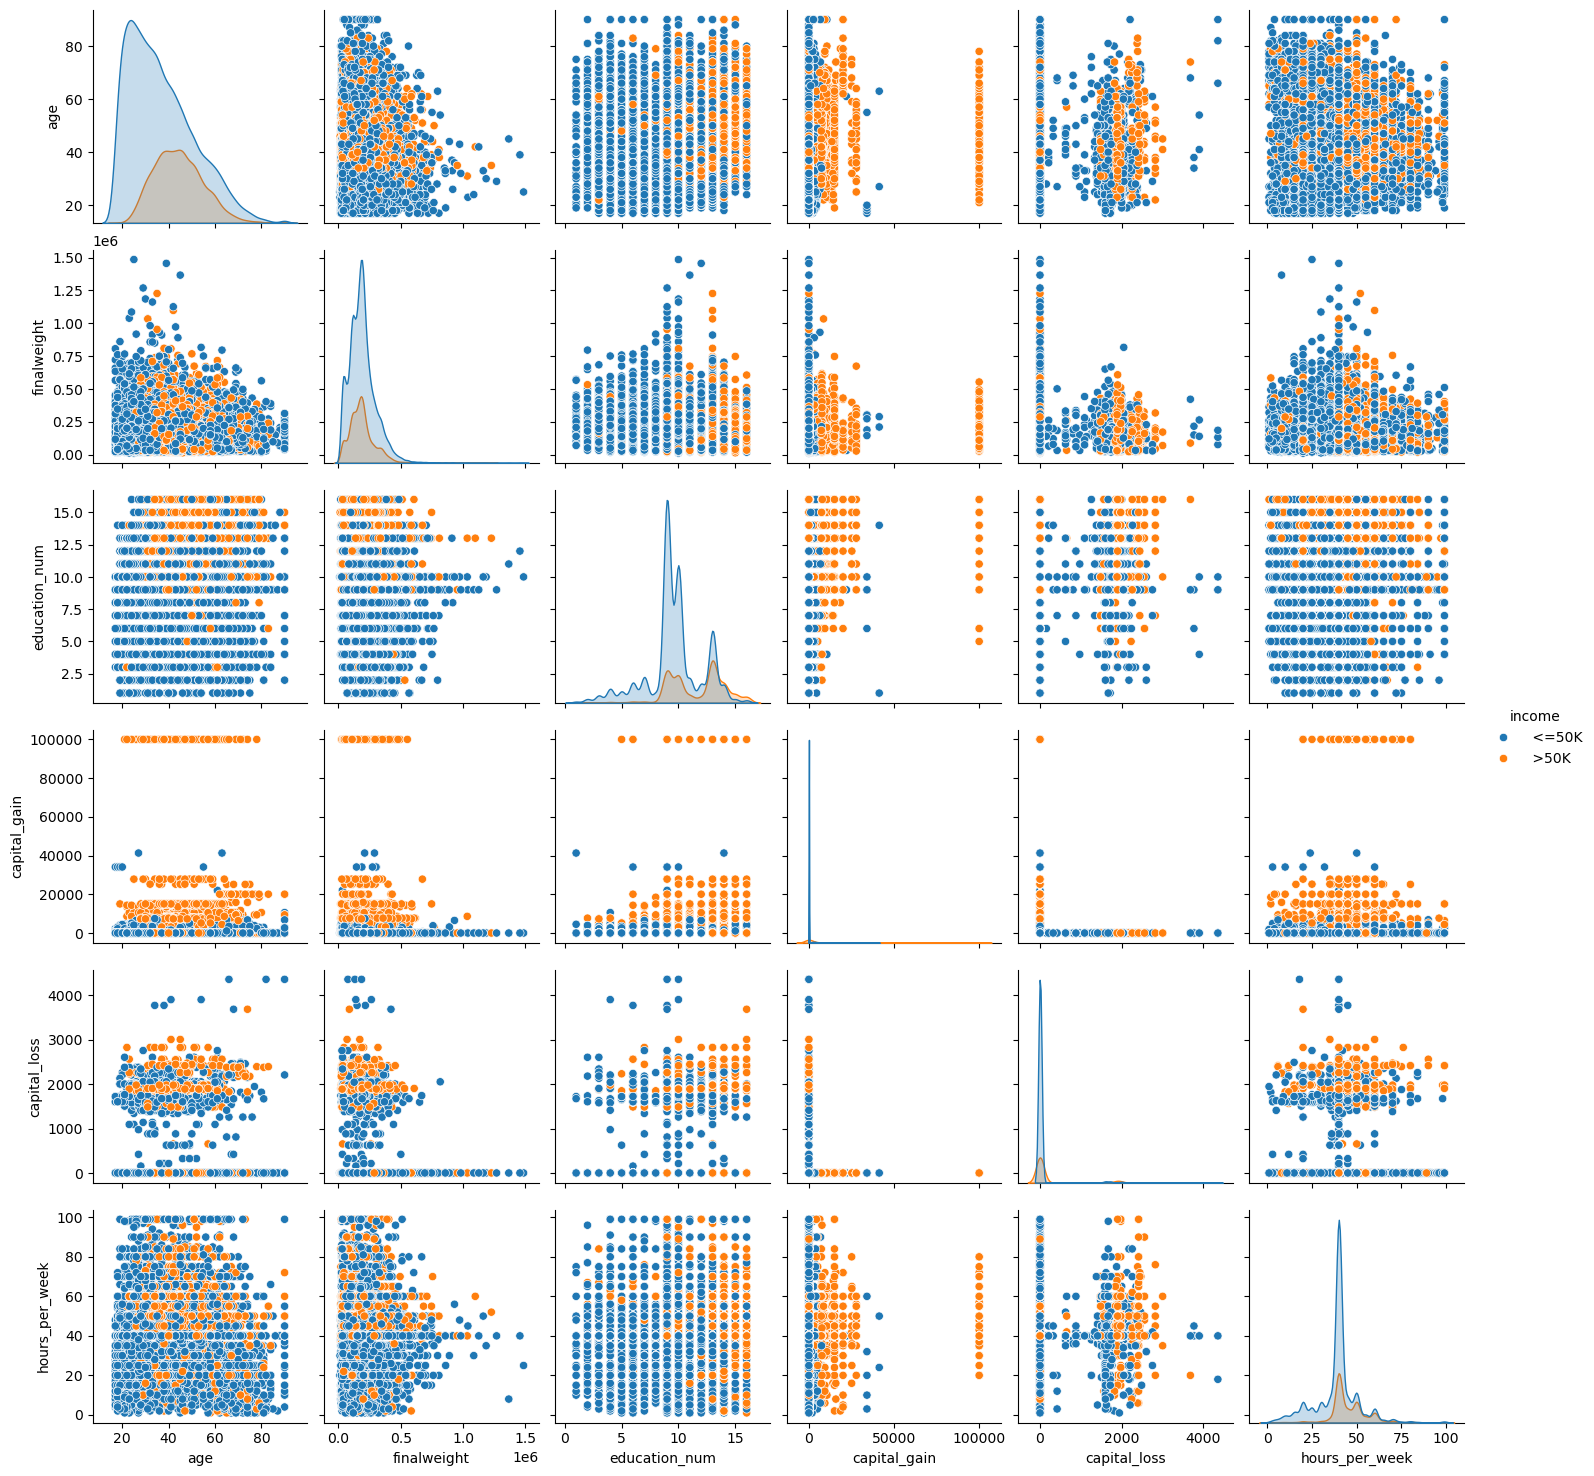

In [43]:
sns.pairplot(df,hue="income")
plt.show()

In [44]:
## inputing

In [45]:
X=df.drop("income",axis=1)

In [46]:
y=df["income"]

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [49]:
categorical=[col for col in X_train.columns if X_train[col].dtype=="O"]


In [50]:
X_train[categorical]

,workclass,education,maritial_status,occupation,relationship,race,sex,native_country
13011,Private,Bachelors,Never-married,Tech-support,Own-child,White,Male,United-States
24494,Private,Some-college,Never-married,Other-service,Not-in-family,White,Female,United-States
16923,Private,Assoc-voc,Married-civ-spouse,Other-service,Husband,Asian-Pac-Islander,Male,India
25335,Self-emp-inc,Masters,Married-civ-spouse,Sales,Husband,White,Male,United-States
12363,Local-gov,Assoc-voc,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States
...,...,...,...,...,...,...,...,...
13128,Local-gov,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
19657,NaN,HS-grad,Never-married,NaN,Not-in-family,Black,Male,United-States
9848,Private,10th,Widowed,Other-service,Other-relative,Asian-Pac-Islander,Female,Philippines
10802,Private,Some-college,Married-civ-spouse,Tech-support,Husband,White,Male,United-States


In [51]:
X_train[categorical].isnull().sum()

workclass          1279
education             0
maritial_status       0
occupation         1284
relationship          0
race                  0
sex                   0
native_country      402
dtype: int64

In [52]:
X_train["workclass"].mode()


0     Private
Name: workclass, dtype: object

In [53]:
X_test[categorical].isnull().sum()

workclass          557
education            0
maritial_status      0
occupation         559
relationship         0
race                 0
sex                  0
native_country     180
dtype: int64

In [54]:
for i in [X_train, X_test]:
    i['workclass'] = i['workclass'].fillna(X_train['workclass'].mode()[0])
    i['occupation'] = i['occupation'].fillna(X_train['occupation'].mode()[0])
    i['native_country'] = i['native_country'].fillna(X_train['native_country'].mode()[0])

In [55]:
X_train[categorical].isnull().sum()


workclass          0
education          0
maritial_status    0
occupation         0
relationship       0
race               0
sex                0
native_country     0
dtype: int64

In [56]:
X_test[categorical].isnull().sum()


workclass          0
education          0
maritial_status    0
occupation         0
relationship       0
race               0
sex                0
native_country     0
dtype: int64

In [57]:
#encoder 

In [58]:
X_train[categorical].head()

,workclass,education,maritial_status,occupation,relationship,race,sex,native_country
13011,Private,Bachelors,Never-married,Tech-support,Own-child,White,Male,United-States
24494,Private,Some-college,Never-married,Other-service,Not-in-family,White,Female,United-States
16923,Private,Assoc-voc,Married-civ-spouse,Other-service,Husband,Asian-Pac-Islander,Male,India
25335,Self-emp-inc,Masters,Married-civ-spouse,Sales,Husband,White,Male,United-States
12363,Local-gov,Assoc-voc,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States


In [59]:
y_train_binary = y_train.apply(lambda x: 1 if x.strip() == '>50K' else 0)

In [60]:
y_train_binary.value_counts()

income
0    17353
1     5422
Name: count, dtype: int64

In [61]:
target_means = y_train_binary.groupby(X_train['native_country']).mean()

In [62]:
target_means

native_country
Cambodia                      0.416667
Canada                        0.348315
China                         0.220000
Columbia                      0.047619
Cuba                          0.272727
Dominican-Republic            0.022222
Ecuador                       0.136364
El-Salvador                   0.111111
England                       0.317460
France                        0.428571
Germany                       0.354839
Greece                        0.368421
Guatemala                     0.043478
Haiti                         0.068966
Holand-Netherlands            0.000000
Honduras                      0.125000
Hong                          0.333333
Hungary                       0.250000
India                         0.400000
Iran                          0.464286
Ireland                       0.157895
Italy                         0.285714
Jamaica                       0.109375
Japan                         0.326087
Laos                          0.111111
Mexico    

In [63]:
X_train['native_country_encoded'] = X_train['native_country'].map(target_means)
X_train['native_country_encoded'] = X_train['native_country_encoded'].fillna(y_train_binary.mean())

X_test['native_country_encoded'] = X_test['native_country'].map(target_means)
X_test['native_country_encoded'] = X_test['native_country_encoded'].fillna(y_train_binary.mean())

In [64]:
X_train = X_train.drop("native_country", axis=1)
X_test = X_test.drop("native_country", axis=1)

In [65]:
X_train.head()

,age,workclass,finalweight,education,education_num,maritial_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country_encoded
13011,36,Private,316298,Bachelors,13,Never-married,Tech-support,Own-child,White,Male,0,0,40,0.242717
24494,30,Private,101283,Some-college,10,Never-married,Other-service,Not-in-family,White,Female,0,0,40,0.242717
16923,41,Private,143003,Assoc-voc,11,Married-civ-spouse,Other-service,Husband,Asian-Pac-Islander,Male,7298,0,60,0.400000
25335,46,Self-emp-inc,216414,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,0,1977,60,0.242717
12363,37,Local-gov,249392,Assoc-voc,11,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,0.242717


In [67]:
df[categorical].nunique()

workclass           8
education          16
maritial_status     7
occupation         14
relationship        6
race                5
sex                 2
native_country     41
dtype: int64

In [68]:
categorical


['workclass',
 'education',
 'maritial_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [71]:
one_hot_categories=[
 "workclass",
 'education',
 'maritial_status',
 'occupation',
 'relationship',
 'race',
 'sex',
]

In [78]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [81]:
encoder = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), one_hot_categories)
    ],
    remainder='passthrough'  # leave the rest of the columns as it is
)

# Fit-transform
X_train_enc = encoder.fit_transform(X_train)
X_test_enc = encoder.transform(X_test)

In [83]:

X_train_enc

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
        40.        ,  0.24271705],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        40.        ,  0.24271705],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        60.        ,  0.4       ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        40.        ,  0.32191781],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        40.        ,  0.24271705],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        48.        ,  0.24271705]])

In [84]:
# get all encoded column names
columns = encoder.get_feature_names_out()

In [85]:
columns

array(['cat__workclass_ Federal-gov', 'cat__workclass_ Local-gov',
       'cat__workclass_ Never-worked', 'cat__workclass_ Private',
       'cat__workclass_ Self-emp-inc', 'cat__workclass_ Self-emp-not-inc',
       'cat__workclass_ State-gov', 'cat__workclass_ Without-pay',
       'cat__education_ 10th', 'cat__education_ 11th',
       'cat__education_ 12th', 'cat__education_ 1st-4th',
       'cat__education_ 5th-6th', 'cat__education_ 7th-8th',
       'cat__education_ 9th', 'cat__education_ Assoc-acdm',
       'cat__education_ Assoc-voc', 'cat__education_ Bachelors',
       'cat__education_ Doctorate', 'cat__education_ HS-grad',
       'cat__education_ Masters', 'cat__education_ Preschool',
       'cat__education_ Prof-school', 'cat__education_ Some-college',
       'cat__maritial_status_ Divorced',
       'cat__maritial_status_ Married-AF-spouse',
       'cat__maritial_status_ Married-civ-spouse',
       'cat__maritial_status_ Married-spouse-absent',
       'cat__maritial_status_ Neve

In [86]:
X_train = pd.DataFrame(X_train_enc, columns=columns, index=X_train.index)
X_test = pd.DataFrame(X_test_enc, columns=columns, index=X_test.index)

In [87]:
X_train

,cat__workclass_ Federal-gov,cat__workclass_ Local-gov,cat__workclass_ Never-worked,cat__workclass_ Private,cat__workclass_ Self-emp-inc,cat__workclass_ Self-emp-not-inc,cat__workclass_ State-gov,cat__workclass_ Without-pay,cat__education_ 10th,cat__education_ 11th,...,cat__race_ White,cat__sex_ Female,cat__sex_ Male,remainder__age,remainder__finalweight,remainder__education_num,remainder__capital_gain,remainder__capital_loss,remainder__hours_per_week,remainder__native_country_encoded
13011,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,36.0,316298.0,13.0,0.0,0.0,40.0,0.242717
24494,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,30.0,101283.0,10.0,0.0,0.0,40.0,0.242717
16923,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,41.0,143003.0,11.0,7298.0,0.0,60.0,0.400000
25335,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,46.0,216414.0,14.0,0.0,1977.0,60.0,0.242717
12363,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,37.0,249392.0,11.0,0.0,0.0,40.0,0.242717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13128,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,42.0,174575.0,13.0,5178.0,0.0,40.0,0.242717
19657,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,49.0,52590.0,9.0,0.0,0.0,40.0,0.242717
9848,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,59.0,221336.0,6.0,0.0,0.0,40.0,0.321918
10802,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,52.0,75839.0,10.0,0.0,0.0,40.0,0.242717


In [88]:
X_test

,cat__workclass_ Federal-gov,cat__workclass_ Local-gov,cat__workclass_ Never-worked,cat__workclass_ Private,cat__workclass_ Self-emp-inc,cat__workclass_ Self-emp-not-inc,cat__workclass_ State-gov,cat__workclass_ Without-pay,cat__education_ 10th,cat__education_ 11th,...,cat__race_ White,cat__sex_ Female,cat__sex_ Male,remainder__age,remainder__finalweight,remainder__education_num,remainder__capital_gain,remainder__capital_loss,remainder__hours_per_week,remainder__native_country_encoded
24188,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,50.0,167886.0,10.0,0.0,0.0,40.0,0.242717
26471,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,25.0,33610.0,9.0,0.0,0.0,45.0,0.242717
26843,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,47.0,239865.0,9.0,0.0,1977.0,45.0,0.242717
8795,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,61.0,30475.0,4.0,0.0,0.0,40.0,0.242717
27178,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,34.0,226883.0,9.0,0.0,0.0,40.0,0.242717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25753,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,32.0,258406.0,10.0,0.0,0.0,72.0,0.052154
16004,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,64.0,159938.0,9.0,8614.0,0.0,40.0,0.242717
11141,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,45.0,108859.0,9.0,0.0,0.0,40.0,0.242717
26572,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,33.0,136331.0,9.0,0.0,0.0,40.0,0.242717


In [89]:
## model eğitimi


In [90]:
from sklearn.ensemble import RandomForestClassifier

In [94]:
rfc = RandomForestClassifier(n_estimators=10, random_state=15)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=15)

In [95]:
y_pred = rfc.predict(X_test)

In [99]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [107]:
print(f'Model accuracy score with 10 decision-trees : {accuracy_score(y_test, y_pred)}')
print(f'classification_report s : {confusion_matrix(y_test, y_pred)}')
print(f'confusion_matrix score  : {classification_report(y_test, y_pred)}')


Model accuracy score with 10 decision-trees : 0.8526941200573653
classification_report s : [[6845  500]
 [ 938 1479]]
confusion_matrix score  :               precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      7345
        >50K       0.75      0.61      0.67      2417

    accuracy                           0.85      9762
   macro avg       0.81      0.77      0.79      9762
weighted avg       0.85      0.85      0.85      9762



In [98]:
score


0.8526941200573653

In [108]:
rfc = RandomForestClassifier(n_estimators=100, random_state=15)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=15)

In [109]:
y_pred = rfc.predict(X_test)

In [110]:
print(f'Model accuracy score with 10 decision-trees : {accuracy_score(y_test, y_pred)}')
print(f'classification_report s : {confusion_matrix(y_test, y_pred)}')
print(f'confusion_matrix score  : {classification_report(y_test, y_pred)}')

Model accuracy score with 10 decision-trees : 0.8561770129071912
classification_report s : [[6820  525]
 [ 879 1538]]
confusion_matrix score  :               precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91      7345
        >50K       0.75      0.64      0.69      2417

    accuracy                           0.86      9762
   macro avg       0.82      0.78      0.80      9762
weighted avg       0.85      0.86      0.85      9762



In [111]:
from sklearn.model_selection import RandomizedSearchCV

In [112]:
rfc=RandomForestClassifier()

In [113]:
rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}

In [114]:
rscv = RandomizedSearchCV(estimator=rfc, param_distributions=rf_params,n_iter=10,cv=3,verbose=2,n_jobs=-1)
rscv.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\ahmet\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
3 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ahmet\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ahmet\anaconda3\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "C:\Users\ahmet\anaconda3\Lib\site-packages\sklearn\base.py", line 436, in _validate_params
    va

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 8, 15, None, 10],
                                        'max_features': [5, 7, 'auto', 8],
                                        'min_samples_split': [2, 8, 15, 20],
                                        'n_estimators': [100, 200, 500, 1000]},
                   verbose=2)

In [115]:
rscv.best_score_

np.float64(0.862041470874615)